<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from submission_to_mask import *
from helpers import *
from mask_to_submission import *

Using TensorFlow backend.


In [2]:
from unet import UNet

In [3]:
unet = UNet(n_channels=1)

In [ ]:
pred = unet.train(batch_size=20, epochs=10)

loading data...
>>> all images will be resized to shape: (608, 608, 1)
data Loaded
loading model...
creating model checkpoint
fitting model...
(100, 608, 608, 1)
(100, 608, 608, 1)
Train on 80 samples, validate on 20 samples
Epoch 1/10
80/80 [==============================] - 666s 8s/step - loss: 5.5516 - f1: 0.3331 - val_loss: 5.2992 - val_f1: 0.3521
Epoch 2/10
80/80 [==============================] - 730s 9s/step - loss: 5.1649 - f1: 0.3332 - val_loss: 4.9109 - val_f1: 0.3523
Epoch 3/10
80/80 [==============================] - 776s 10s/step - loss: 4.7706 - f1: 0.3336 - val_loss: 4.5181 - val_f1: 0.3525
Epoch 4/10
80/80 [==============================] - 778s 10s/step - loss: 4.3747 - f1: 0.3339 - val_loss: 4.1248 - val_f1: 0.3527
Epoch 5/10
60/80 [=====================>........] - ETA: 2:44 - loss: 4.0346 - f1: 0.3326

In [7]:
model = unet.get_model()
model.load_weights("u_net.hdf5")

In [8]:
X_tr, Y, X_te = unet.load_data()

>>> all images will be resized to shape: (608, 608, 1)
data Loaded


In [9]:
pred = model.predict(X_te, batch_size=1, verbose=1)

50/50 [==============================] - 136s 3s/step


In [28]:
path = '../results/predictions.npy'
np.save(path, pred)

In [12]:
pred.shape

(50, 608, 608, 1)

In [14]:
def show(img):
    plt.figure(figsize=(15,7))
    plt.imshow(img, cmap='gray')
    plt.show()
    
def concatenate_images(img, gt):
    return np.concatenate((img, gt), axis=1)

In [17]:
pred[0].reshape(608, 608)

(608, 608, 1)

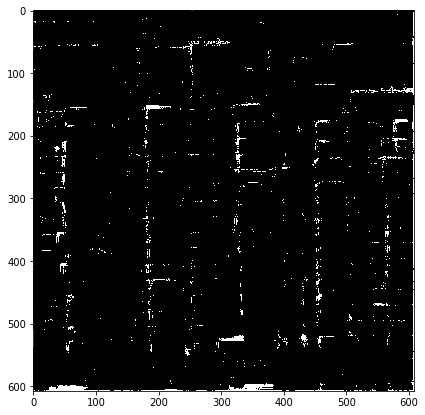

In [27]:
show(pred[0].reshape(608, 608)*255 > 1)

In [7]:
X_tr.shape

(0,)

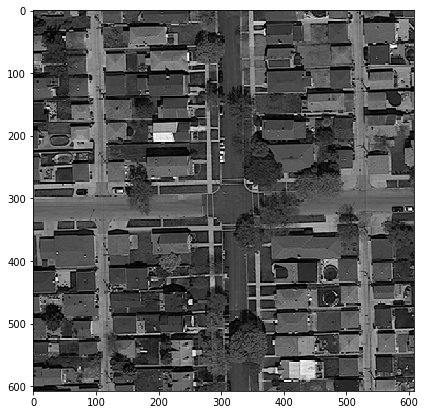

In [37]:
show(X_tr[0])

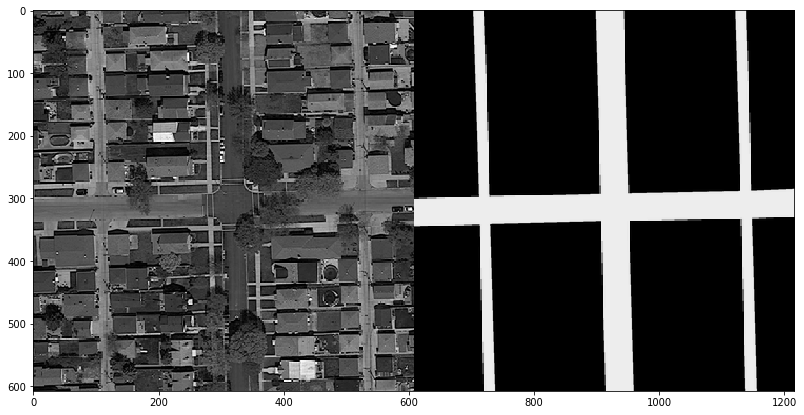

In [38]:
show(concatenate_images(X_tr[0], Y[0]))

In [19]:
Y[0].shape

(608, 608)

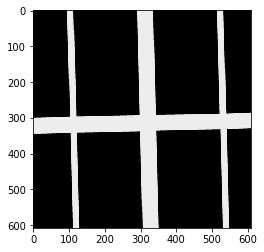

In [35]:
show(np.repeat(Y[0], 3).reshape(608, 608, 3))

In [23]:
X_tr[0].shape

(608, 608, 3)

In [4]:
def ls_rec_path(path):
    return sorted(["{}/{}".format(root, f) for root, _, files in os.walk(path) for f in files])

In [5]:
data_dir = "../../data/"
train_dir = data_dir + "training/"
test_dir = data_dir + "test_set_images/"

path_x_tr = ls_rec_path(train_dir + "images")
path_y_tr = ls_rec_path(train_dir + "groundtruth")
path_x_te = ls_rec_path(test_dir)

In [6]:
len(path_x_tr)

100

In [7]:
masks_to_submission("dummy_submission.csv", *path_y_tr)

In [10]:
sample_size = 10 

In [66]:
im = Image.open(path_x_tr[0])

In [67]:
im2 = im.resize((608, 608))

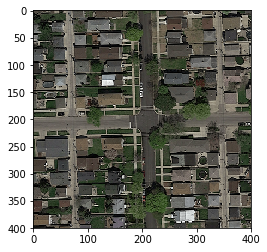

In [68]:
plt.imshow(im)
plt.show()

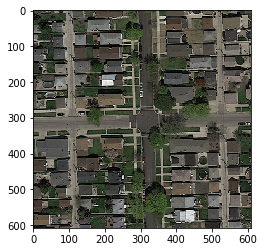

In [69]:
plt.imshow(im2)
plt.show()

In [75]:
np.array(im)

array([[[ 85,  77,  69],
        [ 81,  75,  67],
        [ 78,  72,  64],
        ..., 
        [ 81,  80,  75],
        [ 77,  77,  73],
        [ 78,  78,  74]],

       [[ 82,  74,  67],
        [ 78,  73,  64],
        [ 77,  72,  62],
        ..., 
        [ 81,  81,  76],
        [ 80,  80,  74],
        [ 81,  82,  78]],

       [[ 83,  77,  69],
        [ 81,  73,  65],
        [ 80,  74,  65],
        ..., 
        [ 81,  81,  75],
        [ 80,  80,  74],
        [ 81,  81,  77]],

       ..., 
       [[  7,   8,   5],
        [  9,  10,   7],
        [ 15,  15,  13],
        ..., 
        [ 85,  83,  72],
        [ 84,  82,  73],
        [ 74,  71,  60]],

       [[ 11,  11,   7],
        [  9,   9,   4],
        [  8,   8,   4],
        ..., 
        [197, 195, 177],
        [193, 192, 175],
        [205, 203, 187]],

       [[  5,   5,   2],
        [  9,  10,   6],
        [ 12,  14,   9],
        ..., 
        [179, 178, 165],
        [163, 160, 147],
        [106, 104,

In [77]:
np.array(Image.open(path_y_tr[0]))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
x_train = np.array([np.array(Image.open(p)) for p in path_x_tr[:sample_size]])
x_train.shape

(10, 400, 400, 3)

In [8]:
y_train = np.array([np.array(Image.open(p)) for p in path_y_tr[:sample_size]])
y_train.shape

(10, 400, 400)

In [9]:
yyy = np.stack((y_train[0],y_train[0],y_train[0]), axis=2)
yyy.shape

(400, 400, 3)

In [27]:
plt.imshow(np.concatenate((x_train[0], yyy), axis=1))
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

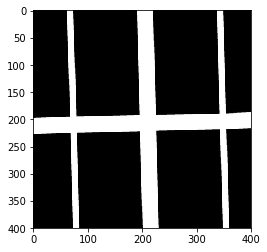

In [11]:
plt.imshow(y_train[0], cmap='gray')
plt.show()

In [12]:
x_test = x_train.copy()
y_test = y_train.copy()

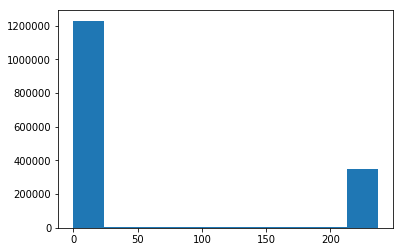

In [13]:
plt.hist(y_train.flatten())
plt.show()

TabError: inconsistent use of tabs and spaces in indentation (model.py, line 9)